# netCDF creator for point data
This notebook will aid in the use of the netCDF4 package and to correctly format your data in accordance with CF metadata conventions (https://cfconventions.org/). This notebook is focused on point data (such as lat,lon,number) usually collected in transects or grids, with a special focus on data collected with UAV's. However, this notebook should be useful for any type of transect dataset.

In [1]:
# Imports

import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import netCDF4  # Note: python is case-sensitive!
import datetime
from netCDF4 import date2num, num2date
import time
import warnings
import uwibasspp # This is only to be able to import the example dataset

warnings.filterwarnings("ignore")

# Define metadata global attributes
Global attributes required to generate discovery metadata.
Edit these attributes according to the conventions. Go to https://adc.met.no/node/4 for explanations.


In [2]:
# For now it is set as separate variables to facilitate GUI input

# "Default values"
title = "Snow depth from UAV GPR"
conventions = "CF-1.6"
username = "Rolf"
source = "UWB radar"
featureType = "trajectory"
summary = (
    "Snow depth survey from drone-mounted UWB radar system."  # This can/should be long
)
license = "https://spdx.org/licenses/CC-BY-4.0.html(CC-BY-4.0)"  # Creative Commons Attribution 4.0 International
keywords = "GCMDSK:EARTH SCIENCE > SPECTRAL/ENGINEERING > RADAR > RADAR IMAGERY, GCMDSK:EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW DEPTH"  # found at https://wiki.met.no/_media/polarprofile/products/metadatavocab/gcmd_science_keywords.pdf
keywords_vocabulary = "GCMDSK:GCMD Science Keywords"
data_assembly_center = "NORCE"
iso_topic_category = "climatologyMeteorologyAtmosphere"
creator_type = "Person"
creator_institution = "NORCE"
creator_name = "Rolf-Ole Rydeng Jenssen"
creator_email = "roje@norceresearch.no"
creator_url = "None"
institution = "NORCE Norwegian Research Centre"
project = "SIOS"
platform = "SIOS-Copernicus"
instrument = "Ultra Wideband Snow Sounder (UWiBaSS)"
# id = "something unique" # Datacenter host adds this
# publisher_email = " " # Datacenter host adds this
# publisher_url = " " # Datacenter host adds this
# publisher_name = "MET" # Datacenter host adds this
# naming_authority = "TBA" # Datacenter host adds this
# processing_level = "0-4" # Not important for all data https://www.earthdata.nasa.gov/engage/open-data-services-and-software/data-information-policy/data-levels


# These are attributes you might change between each dataset
notes = "Sawtooth survey. 5 m/s alt 8 m" # Example notes
station_name_local = "Fardalen" # Station name, or area name.


# Load the dataset
This notebook is based around Python Classes and Objects.
In this example, the processed data is stored as a .pkl file, but it can be of any format as long as it is correctly assigned in the "Write data to variables" cell.

In [3]:
# # Define class for dataset import. This is specific to the example dataset
# class rdr:
#     def __init__(self):
#         self.rxc = None

# Name of dataset you wish to import.
dataset_name = "2021_15_04_test"
file_ext = ".pkl"

# Directory where said file is
directory = "/home/jovyan/netCDF/tmp/"

with open(directory + dataset_name + file_ext, "rb") as inp:
    data = pickle.load(inp)

# Make output filename
Decide what your .nc file should be called

In [4]:
output_name = 'netCDF_output'
# Or set it to the same as the dataset name
output_name = dataset_name


# Create NC file and add global attributes
Now we can create the .nc file and assign the previously defined attributes.

In [5]:

try:
    ncfile.close()  # just to be safe, make sure dataset is not already open.
    print("closed already open .nc file")
except:
    pass

# ncfile = netCDF4.Dataset("tmp/test.nc", mode="w", format="NETCDF4") # It might be useful to create a test.nc file in the beginning
# ncfile = netCDF4.Dataset("tmp/" + output_name + ".nc", mode="w", format="NETCDF4") # Assign dataset name to .nc file
ncfile = netCDF4.Dataset(directory + output_name + ".nc", mode="w", format="NETCDF4") # Put .nc file in the same directory as the dataset

# Generate datetime from timestamp
date_time = []
for i in data.timestamp:
    date_time.append(datetime.datetime.fromtimestamp(float(i)).isoformat())


# ACDD global attributes required to generate discovery metadata (extract from ACDD documentation)

# All of this should be string! Might be overkill to add str() here, but it might catch some mistakes when modding this code.

ncfile.title = str(title)
ncfile.Conventions = str(conventions)
ncfile.featureType = str(featureType)
ncfile.summary = str(summary)
ncfile.license = str(license)
ncfile.keywords = str(keywords)
ncfile.keywords_vocabulary = str(keywords_vocabulary)
ncfile.data_assembly_center = str(data_assembly_center)
ncfile.iso_topic_category = str(iso_topic_category)
ncfile.geospatial_lat_min = str(np.min(data.lat))
ncfile.geospatial_lat_max = str(np.max(data.lat))
ncfile.geospatial_lon_min = str(np.min(data.lon))
ncfile.geospatial_lon_max = str(np.max(data.lon))
ncfile.time_coverage_start = str(date_time[0])
ncfile.time_coverage_end = str(date_time[-1])
ncfile.history = str(
    (
        "Date and time of creation: ["
        + str(datetime.datetime.now().isoformat())
        + "] User: ["
        + username
        + "] Notes: ["
        + notes
        + "]"
    )
)
ncfile.source = str(source)
date_created = str(datetime.datetime.now().isoformat())
ncfile.creator_type = str(creator_type)
ncfile.creator_institution = str(creator_institution)
ncfile.creator_name = str(creator_name)
ncfile.creator_email = str(creator_email)
ncfile.creator_url = str(creator_url)
ncfile.institution = str(institution)
ncfile.project = str(project)
ncfile.platform = str(platform)
ncfile.instrument = str(instrument)

# ncfile.id = id
# ncfile.publisher_email = str(publisher_email)
# ncfile.publisher_url = str(publisher_url)
# ncfile.publisher_name = str(publisher_name)
# ncfile.naming_authority = naming_authority
# ncfile.processing_level = processing_level


# Create dimensions

station_name_strlen_dim = ncfile.createDimension(
    "station_name_strlen", len(station_name_local)
)  # Station name
relTime_dim = ncfile.createDimension(
    "relTime", len(data.timestamp)
)  # relative time axis
fasttime_dim = ncfile.createDimension(
    "fasttime", len(data.fasttime)
)  # relative time axis


print(ncfile.history)


Date and time of creation: [2023-01-02T10:20:28.010087] User: [Rolf] Notes: [Sawtooth survey. 5 m/s alt 8 m]


# Define variables with time dimension
Standard names: https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

In [6]:
# Station name variable...
station_name = ncfile.createVariable("station_name", "S1", ("station_name_strlen",))
# station_name.units = 'none'
station_name.long_name = "Station name"
station_name.cf_role = "trajectory_id"

# UAV flightstates

latitude = ncfile.createVariable("latitude", np.float64, ("relTime",))
latitude.units = "degrees_north"
latitude.long_name = "latitude"

longitude = ncfile.createVariable("longitude", np.float64, ("relTime",))
longitude.units = "degrees_east"
longitude.long_name = "longitude"

altitude = ncfile.createVariable("altitude", np.float32, ("relTime",))
altitude.units = "m"
altitude.standard_name = "altitude"
altitude.positive = "down"  # This takes a value of ‘up’ or ‘down’, indicating whether more positive values are further away from earth center (up), or toward earth center.

altimeter_range = ncfile.createVariable("altimeter_range", np.float32, ("relTime",))
altimeter_range.units = "m"
altimeter_range.standard_name = "altimeter_range"
altimeter_range.positive = "down"  # This takes a value of ‘up’ or ‘down’, indicating whether more positive values are further away from earth center (up), or toward earth center.

platform_roll = ncfile.createVariable("platform_roll", np.float32, ("relTime",))
platform_roll.units = "degree"
platform_roll.standard_name = "platform_roll"

platform_pitch = ncfile.createVariable("platform_pitch", np.float32, ("relTime",))
platform_pitch.units = "degree"
platform_pitch.standard_name = "platform_pitch"

platform_yaw = ncfile.createVariable("platform_yaw", np.float32, ("relTime",))
platform_yaw.units = "degree"
platform_yaw.standard_name = "platform_yaw"

relTime = ncfile.createVariable("relTime", np.float64, ("relTime",))
relTime.units = "seconds since 1970-01-01"
relTime.long_name = "Seconds since epoch"

# Radar data

air_snow = ncfile.createVariable("air_snow", np.float32, ("relTime",))
air_snow.units = "1"
air_snow.long_name = "Index indicating position of snow surface (snow-air interface). Can be offset relative to image"

snow_ground = ncfile.createVariable("snow_ground", np.float32, ("relTime",))
snow_ground.units = "1"
snow_ground.long_name = "Index indicating position of snow-ground interface. Can be offset relative to image"

snow_ground_rel = ncfile.createVariable("snow_ground_rel", np.float32, ("relTime",))
snow_ground_rel.units = "1"
snow_ground_rel.long_name = "Index indicating position of snow-ground interface relative to a flattened top surface. Can be offset relative to image"

depth = ncfile.createVariable(
    "depth", np.float64, ("relTime",)
)  # note: unlimited dimension is leftmost
depth.units = "m"  # snow depth # Converting to meters in the next cell [m]
depth.standard_name = "surface_snow_thickness"  # this is a CF standard name

bscan = ncfile.createVariable(
    "bscan", np.float32, ("fasttime", "relTime")
)  # note: unlimited dimension is leftmost
# bscan.units = 'cm' # snow depth
bscan.long_name = "Radar image B-scan. Pre-processed with fourier filtering and singular value decomposition (SVD)."  #
# print(depth)



# Write data to variables
Here we actually add our data to the previously defined variables. 

In [7]:
from sqlite3 import Timestamp
from netCDF4 import stringtochar

station_name._Encoding = 'ascii'
station_name[:] = stringtochar(np.array(station_name_local,dtype='S'+str(len(station_name_local))))


# Note: the "[:]" is necessary in these "write" statements

latitude[:] = data.lat
longitude[:] = data.lon
relTime[:] = data.timestamp

altitude[:] = data.alt
altimeter_range[:] = data.rngf/100 # Orgininally in [cm] from the dataset 
platform_roll[:] = data.roll
platform_pitch[:] = data.pitch
platform_yaw[:] = data.yaw
bscan[:,:] = data.rxsvd

air_snow[:] = data.top
snow_ground[:] = data.bottom
snow_ground_rel[:] = data.bottom_no_rec

# create a  array of snow depth
depth[:] = data.depth_snow/100  # Appends data along unlimited dimension, in [m]


# At this point we are done with the .nc file and can close it
ncfile.close()

# Read netCDF file
Check if everything looks good. Pay special attention to the number formatting. If float64 is not needed, consider reducing the precision.

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Snow depth from UAV GPR
    Conventions: CF-1.6
    featureType: trajectory
    summary: Snow depth survey from drone-mounted UWB radar system.
    license: https://spdx.org/licenses/CC-BY-4.0.html(CC-BY-4.0)
    keywords: GCMDSK:EARTH SCIENCE > SPECTRAL/ENGINEERING > RADAR > RADAR IMAGERY, GCMDSK:EARTH SCIENCE > CRYOSPHERE > SNOW/ICE > SNOW DEPTH
    keywords_vocabulary: GCMDSK:GCMD Science Keywords
    data_assembly_center: NORCE
    iso_topic_category: climatologyMeteorologyAtmosphere
    geospatial_lat_min: 78.1503437
    geospatial_lat_max: 78.1531237
    geospatial_lon_min: 15.505962499999999
    geospatial_lon_max: 15.521102399999998
    time_coverage_start: 2021-04-15T09:07:53.692758
    time_coverage_end: 2021-04-15T09:20:45.727875
    history: Date and time of creation: [2023-01-02T10:20:28.010087] User: [Rolf] Notes: [Sawtooth survey. 5 m/s alt 8 m]
    source: UWB radar
    crea

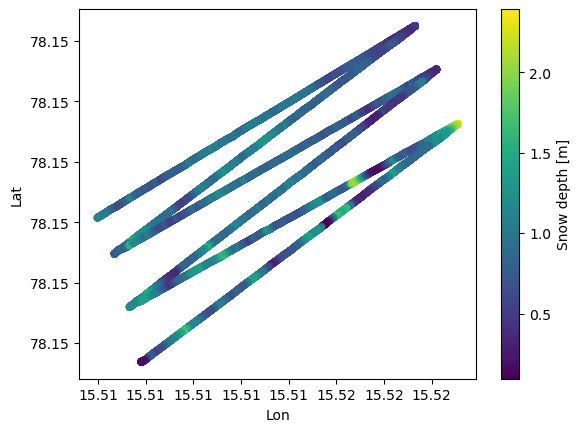

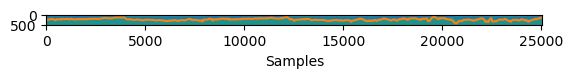

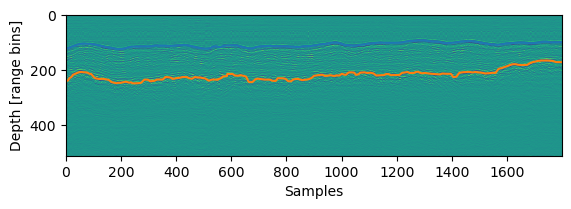

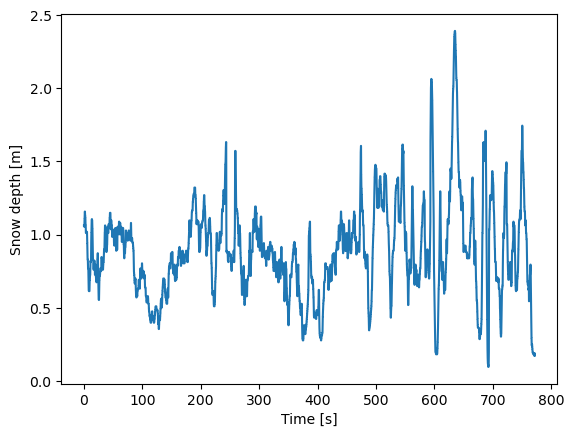

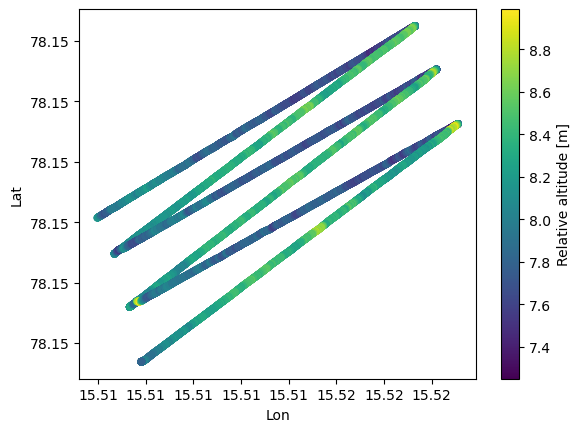

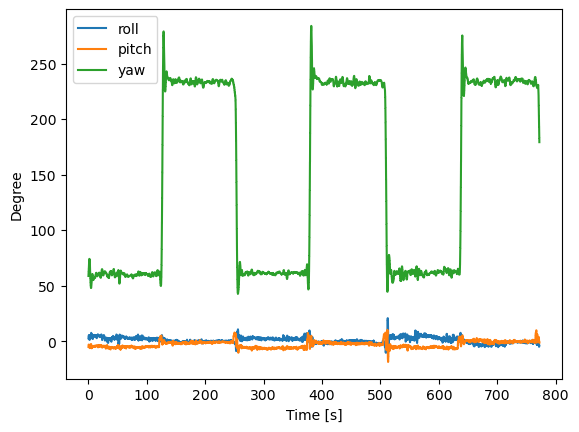

In [8]:


# from numpy import float16, float32, float64
import netCDF4
import matplotlib.pyplot as plt


# Load the test file
# f = netCDF4.Dataset('tmp/test.nc', 'r')
# Or the file from the directory
f = netCDF4.Dataset(directory + output_name + ".nc", 'r')


# Print the metadata to terminal
print(f) 


# Extract the variables you wish to plot from the specified netCDF classes
depth = f.variables['depth'][:]  
lat = f.variables['latitude'][:]  
lon = f.variables['longitude'][:]
rel_alt = f.variables['altimeter_range'][:]
roll = f.variables['platform_roll'][:]  
pitch = f.variables['platform_pitch'][:]
yaw = f.variables['platform_yaw'][:]
time = f.variables['relTime'][:]
image = f.variables['bscan'][:,:]
top = f.variables['air_snow'][:]
bottom = f.variables['snow_ground_rel'][:]
station_name_load = f.variables['station_name'][:]

# # Might be useful for debugging to print all variable names
# for dname, d in f.variables.items():
#     print(d)

# plot as separate window
# %matplotlib qt

plt.figure()
plt.scatter(lon,lat,s=20,c=depth)
plt.colorbar(label = 'Snow depth [m]')
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

# Show whole image
plt.figure()
plt.imshow(image)
plt.plot(top)
plt.plot(bottom)
plt.xlabel('Samples')
# plt.ylabel('Depth [range bins]')

# Show section of image
section = (1200,3000)
plt.figure()
plt.imshow(image[:,section[0]:section[1]])
plt.plot(top[section[0]:section[1]])
plt.plot(bottom[section[0]:section[1]])
plt.xlabel('Samples')
plt.ylabel('Depth [range bins]')


plt.figure()
plt.plot(time-time[0],depth)
plt.xlabel('Time [s]')
plt.ylabel('Snow depth [m]')

plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(lat, lon, rel_alt, c=rel_alt)
plt.scatter(lon,lat,s=20,c=rel_alt)
plt.colorbar(label = 'Relative altitude [m]')
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.figure()
plt.plot(time-time[0],roll,label = 'roll')
plt.plot(time-time[0],pitch,label = 'pitch')
plt.plot(time-time[0],yaw,label = 'yaw')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Degree')

plt.show()

# Some additional utility that could be useful
-Find the name of a location given a coordinate

-Export data as .kml to plot in e.g., Google earth

In [9]:
# # Given lat lon, get name of area
# # import module
# from geopy.geocoders import Nominatim
# # initialize Nominatim API
# geolocator = Nominatim(user_agent="netCDF Generator")

# name_lat = str(data.lat[0])
# name_lon = str(data.lon[0])

# # Find location based on first coordinate in dataset 
# location = geolocator.reverse(name_lat+","+name_lon)
 
# # # Display
# print(location)

In [10]:
# # Export to .kml as well

# from __future__ import print_function
# from googleearthplot.googleearthplot import googleearthplot

# lon=data.lon#degree
# lat=data.lat#degree
# num = data.depth_snow
# size=1  #meter
# name="Snow depth"

# gep1=googleearthplot()

# gep1.PlotLineChart(lat, lon, heightList=num, name=name,color="aqua")

# gep1.GenerateKMLFile(filepath="tmp/test.kml")